In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [0]:
# Function to convert image from greyscale to one hot (i.e. 4 channels)
def convertToOneHot(image):
    num_classes = 3
    shape = image.shape[:2]+(num_classes,)
    encoded_image = np.zeros(shape, dtype=np.uint8)
    for r in range(len(image)):
      for c in range(len(image[0])):
        if image[r][c]==0:
          encoded_image[r][c][0] = 1
        elif image[r][c]==128:
          encoded_image[r][c][1] = 1
        else:
          encoded_image[r][c][2] = 1
    return encoded_image

In [0]:
PATH = "/content/drive/My Drive/Breast Cancer Treatment/Numpy Arrays/Predicted Output/Negative/Train"
samples = np.load(PATH + '/232.npy')

In [0]:
actual = np.load("/content/drive/My Drive/Breast Cancer Treatment/Numpy Arrays/Negative Masks/ER IHC 232.npy")

In [0]:
# Initial Preprocessing
from skimage.morphology import erosion, dilation, opening, closing, disk, reconstruction
from skimage.filters import gaussian, prewitt
selem = disk(10)
eroded = erosion(samples[3], selem)
opened = reconstruction(eroded, samples[3], method = 'dilation')
dilated = dilation(opened, selem)
closed = reconstruction(dilated, opened, method = 'erosion')

In [0]:
# Finding sure foreground area
from scipy import ndimage as ndi
from skimage.feature import peak_local_max

def imregionalmax(image, ksize=2):
  """Similar to matlab's imregionalmax"""
  filterkernel = np.ones((ksize, ksize)) # 8-connectivity
  reg_max_loc = peak_local_max(image,
                               footprint=filterkernel, indices=False,
                               exclude_border=0)
  return reg_max_loc.astype(np.uint8)

dist_transform = ndi.distance_transform_edt(closed)
foreground = imregionalmax(dist_transform)

In [0]:
# Some more processing
selem = disk(8)
foreground_1 = closing(foreground, selem)
selem = disk(2)
foreground_2 = erosion(foreground_1, selem)

In [0]:
# remove small objects
from skimage.color import label2rgb
from skimage.morphology import remove_small_objects

foreground_3 = remove_small_objects(foreground_2.astype(bool), min_size=200)

# _, labeled_fg = cv2.connectedComponents(foreground_3.astype(np.uint8))
# labeled_fg = labeled_fg +1
# col_labeled_fg = label2rgb(labeled_fg)

In [0]:
#counting strong and intermediate nuclei
from skimage import measure
from skimage.measure import regionprops
negative = measure.label(foreground_3)
# strong = measure.label(final[:,:,2])
# iprops = regionprops(intermediate)
# sprops = regionprops(strong)

In [0]:
print(negative.max())
# print(intermediate.max())

24


In [0]:
negative_input = cv2.imread('/content/drive/My Drive/Breast Cancer Treatment/_ER/Negative/IHC 232/_10379.png')
# i_input = cv2.imread('/content/drive/My Drive/Breast Cancer Treatment/_ER/Intermediate/IHC 239/_9790.png')

In [0]:
nMask  = cv2.cvtColor(negative_input, cv2.COLOR_BGR2GRAY)
ret, nMask = cv2.threshold(nMask, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
# sMask  = cv2.cvtColor(s_input, cv2.COLOR_BGR2GRAY)
# ret, sMask = cv2.threshold(sMask, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

In [0]:
print(measure.label(nMask).max())
# print(measure.label(iMask).max())

24


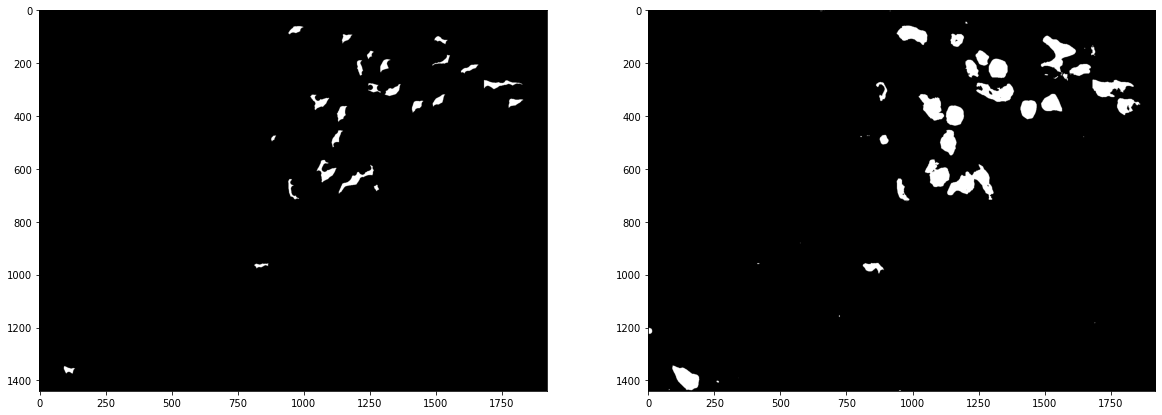

In [0]:
# print(final.shape)
plt.figure(figsize = (20, 20))
plt.subplot(221).imshow(foreground_3, 'gray')
plt.subplot(222).imshow(samples[3], 'gray')
# plt.subplot(223).imshow(labeled_fg, cmap=plt.cm.nipy_spectral)
# # plt.subplot(224).imshow(markers, cmap=plt.cm.nipy_spectral)
# plt.subplot(224).imshow(superimposed, 'gray')

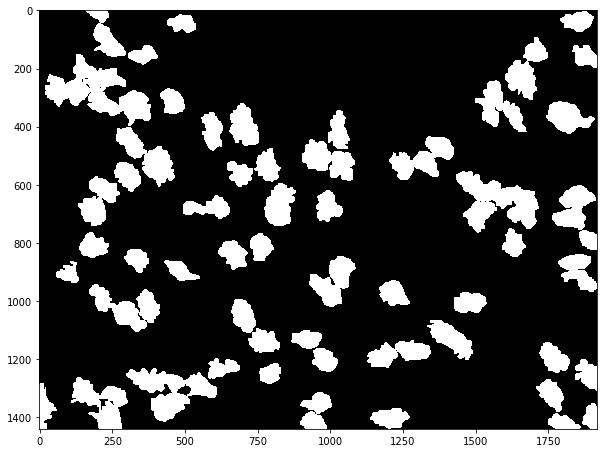

In [0]:
plt.figure(figsize = (10, 10))
plt.subplot().imshow(sMask, 'gray')